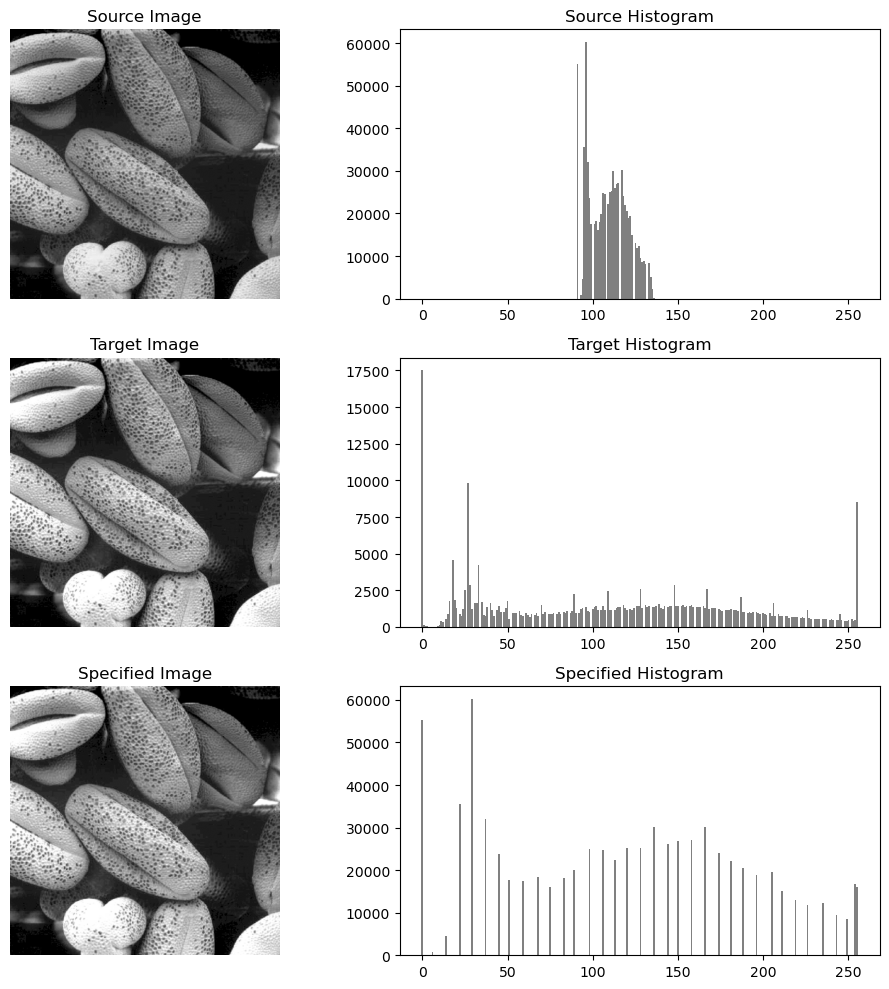

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def calculate_histogram(image):
    
    histogram = [0] * 256
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            intensity = image[i, j]
            histogram[intensity] += 1
    return histogram

def calculate_cdf(histogram):
    
    cdf = [0] * len(histogram)
    cdf[0] = histogram[0]
    for i in range(1, len(histogram)):
        cdf[i] = cdf[i - 1] + histogram[i]
    return cdf

def histogram_specification(source_image, target_image):
    # Calculate histograms and CDFs
    source_hist = calculate_histogram(source_image)
    target_hist = calculate_histogram(target_image)

    source_cdf = calculate_cdf(source_hist)
    target_cdf = calculate_cdf(target_hist)

    # Normalize CDFs
    source_cdf = np.array(source_cdf) / source_cdf[-1]
    target_cdf = np.array(target_cdf) / target_cdf[-1]

    # Create mapping using vectorized broadcasting
    mapping = np.array([np.argmin(np.abs(target_cdf - s_cdf)) for s_cdf in source_cdf], dtype=np.uint8)

    # Apply mapping to the entire image at once
    specified_image = mapping[source_image]

    return specified_image

# Main function
if __name__ == "__main__":
    # Load the source and target images
    source_path = "C:/Users/gaura/Downloads/Pollen.tif" # Replace with the path to the source image
    target_path = "C:/Users/gaura/Downloads/Target.tif"  # Replace with the path to the target image

    source_img = Image.open(source_path).convert('L')
    target_img = Image.open(target_path).convert('L')

    source_array = np.array(source_img)
    target_array = np.array(target_img)

    # Perform histogram specification
    specified_img = histogram_specification(source_array, target_array)

    # Calculate histograms
    source_histogram = calculate_histogram(source_array)
    target_histogram = calculate_histogram(target_array)
    specified_histogram = calculate_histogram(specified_img)

    # Display results
    plt.figure(figsize=(15, 10))

    # Source image and histogram
    plt.subplot(3, 3, 1)
    plt.imshow(source_array, cmap='gray')
    plt.title('Source Image')
    plt.axis('off')

    plt.subplot(3, 3, 2)
    plt.bar(range(256), source_histogram, color='gray', width=1)
    plt.title('Source Histogram')

    # Target image and histogram
    plt.subplot(3, 3, 4)
    plt.imshow(target_array, cmap='gray')
    plt.title('Target Image')
    plt.axis('off')

    plt.subplot(3, 3, 5)
    plt.bar(range(256), target_histogram, color='gray', width=1)
    plt.title('Target Histogram')

    # Histogram-specified image and histogram
    plt.subplot(3, 3, 7)
    plt.imshow(specified_img, cmap='gray')
    plt.title('Specified Image')
    plt.axis('off')

    plt.subplot(3, 3, 8)
    plt.bar(range(256), specified_histogram, color='gray', width=1)
    plt.title('Specified Histogram')

    plt.tight_layout()
    plt.show()